In [1]:
import numpy as py
import networkx as net

In [2]:
class Vertices:
    def __init__(self, value):
        self._value = value
        self._edges = {}
        self._isVisited = False
        
    def addEdge(self, vertex, weight):
        if self._edges.get(vertex) is None:
            self._edges[vertex] = weight
            
    def getEdges(self):
        return self._edges
    
    def getValue(self):
        return self._value

In [3]:
class Graph:
    
    def __init__(self):
        self.__vertices = []
        
    def addVertices(self,value,edge,weight):
        if value == edge:
            return "Invalid Edge"
        
        vertex1 = py.NaN
        vertex2 = py.NaN

        for vertex in self.__vertices:
            if vertex.getValue() == value:
                vertex1 = vertex
            elif vertex.getValue() == edge:
                vertex2 = vertex

        if vertex1 is py.NaN:
            vertex1 = Vertices(value)
            self.__vertices.append(vertex1)
            
        if vertex2 is py.NaN:
            vertex2 = Vertices(edge)
            self.__vertices.append(vertex2)
            
        vertex1.addEdge(vertex2, weight)
            
    def show(self):
        print(" ", end="\t")
        for v in self.__vertices:
            print(v.getValue(), end='\t')
        print()

        for v in self.__vertices:
            print(v.getValue(), end="\t")
            edges = v.getEdges()
            for e in self.__vertices:
                if edges.get(e) is None:
                    print(".", end="\t")
                else:
                    print(edges.get(e), end="\t")
            print()

In [4]:
class Graph2:
   
    def __init__(self):
        self.visual = []

    def addEdge(self, vertex, neighbor):
        temp = [vertex, neighbor]
        self.visual.append(temp)
          
    def visualize(self):
        G = net.Graph()
        G.add_edges_from(self.visual)
        net.draw_networkx(G)

 	S	F	A	B	G	C	D	E	
S	.	3	2	1	.	.	.	.	
F	.	.	.	.	6	.	.	.	
A	.	.	.	.	.	2	3	.	
B	.	.	.	.	.	.	2	4	
G	.	.	.	.	.	.	.	.	
C	.	.	.	.	4	.	.	.	
D	.	.	.	.	4	.	.	.	
E	.	.	.	.	.	.	.	.	


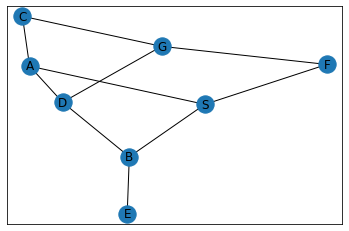

In [5]:
g = Graph()
g.addVertices('S','F',3)
g.addVertices('S','A',2)
g.addVertices('S','B',1)
g.addVertices('F','G',6)
g.addVertices('A','C',2)
g.addVertices('A','D',3)
g.addVertices('B','D',2)
g.addVertices('B','E',4)
g.addVertices('C','G',4)
g.addVertices('D','G',4)
g.show()

G = Graph2()
G.addEdge('S','F')
G.addEdge('S','A')
G.addEdge('S','B')
G.addEdge('F','G')
G.addEdge('A','C')
G.addEdge('A','D')
G.addEdge('B','D')
G.addEdge('B','E')
G.addEdge('C','G')
G.addEdge('D','G')
G.visualize()

In [6]:
graph = {
  'S' : ['F','A','B'],
  'B' : ['D', 'E'],
  'A' : ['C','D'],
  'F' : ['G'],
  'C' : ['G'],
  'D' : ['G'],
  'G' : [],
  'E' : []
}

In [7]:
visited = []
queue = []
    
def bfs(visited, graph, node, exit):
    visited.append(node)
    queue.append(node)

    while queue:
        s = queue.pop(0) 
        if s == exit:
            print(s, end=" ")
            return 
        else:
            print (s, end = " ") 

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

bfs(visited, graph, 'S','G')

S F A B G 

In [8]:
visited = set()

def dfs(visited, graph, node,exit):
    while visited != exit:
        if exit in visited:
            break
        if node not in visited:
            print (node, end=" ")
            visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour,exit)

dfs(visited, graph, 'S','G')

S F G 

In [9]:
class Graph:
    
    def __init__(self, gDict=None, directed=True):
        self.gDict = gDict or {}
        self.directed = directed
        if not directed:
            self.makeUndirected()
            
#Undirected Graph by adding symmetric Edges
    def makeUndirected(self):
        for a in list(self.gDict.keys()):
            for (b, dist) in self.gDict[a].items():
                self.gDict.setdefault(b,{})[a] = dist
                
#Linking A and B from the given distance
#Reverse link if graph !directed
    def connection (self, A, B, distance=1):
        self.gDict.setdefault(A,{})[B] = distance
        if not self.directed:
            self.gDict.setdefault(B,{})[A] = distance
            
#Getting neighbors
    def get(self, a, b=None):
        links = self.gDict.setdefault(a,{})
        if b is None:
            return links
        else:
            return links.get(b)
        
#Returning list of nodes in graph
    def nodes(self):
        node1 = set([k for k in self.gDict.keys()])
        node2 = set([k2 for v in self.gDict.values() for k2,v2 in v.items])
        nodes = nodes1.union(nodes2)
        return list(nodes)
    
class Node:
    
    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.start = 0
        self.end = 0
        self.total = 0
        
#comparing nodes
    def __eq__ (self, other):
        return self.name == other.name

#sorting nodes
    def __lt__ (self, other):
        return self.total < other.total

#print node
    def __repr__ (self):
        return ('({0},{1})'.format(self.name,self.total))
    
#A star search 
def a_star_search(graph, heuristics, source, exit):
#create list for open and close nodes
    open = []
    closed=[]
#creating source node and exit node
    source_node = Node(source, None)
    exit_node = Node(exit, None)
#adding the source node
    open.append(source_node)
    
#Looping until list is empty
    while len(open)>0:
#sorting the open nodes w/ lowest cost
        open.sort()
#getting the node w/ lowest cost
        current_node = open.pop(0)
#adding current node to closed nodes
        closed.append(current_node)
    
#check if goal is reached and return path
        if current_node == exit_node:
            path = []
            while current_node != source_node:
                path.append(current_node.name + ' distance: '+ str(current_node.start)+'\n')
                current_node = current_node.parent
            path.append(current_node.name + ' distance: '+ str(current_node.start)+'\n')
            return path[::-1]
    
#getting neighbors
        neighbors = graph.get(current_node.name)
#looping neighbors
        for key,value in neighbors.items():
            neighbors = Node(key, current_node)
            if (neighbors in closed):
                continue
            neighbors.start = current_node.start + graph.get(current_node.name,neighbors.name)
            neighbors.exit = heuristics.get(neighbors.name)
            neighbors.total = neighbors.start + neighbors.exit
            if (add_to_open(open,neighbors) == True):
                open.append(neighbors)
    return None

def add_to_open(open, neighbors):
    for node in open:
        if (neighbors == node and neighbors.total > node.total):
            return False
    return True

def main():
    graph = Graph()

    graph.connection('S', 'A', 2)
    graph.connection('S', 'F', 3)
    graph.connection('S', 'B', 1)
    graph.connection('F', 'G', 6)
    graph.connection('A', 'C', 2)
    graph.connection('A', 'D', 3)
    graph.connection('B', 'D', 2)
    graph.connection('B', 'E', 4)
    graph.connection('C', 'G', 4)
    graph.connection('D', 'G', 4)
    graph.makeUndirected()
    
    heuristics = {}
    heuristics['S'] = 6
    heuristics['A'] = 4
    heuristics['B'] = 5
    heuristics['C'] = 2
    heuristics['D'] = 2
    heuristics['E'] = 8
    heuristics['F'] = 4
    heuristics['G'] = 0
    
    path = a_star_search(graph,heuristics,'S','G')
    for i in range(0,len(path)):
        if(i+1 == len(path)):
            print(path[i])
        else:
            print(path[i], end = "")
            
if __name__ == "__main__": main()

S distance: 0
B distance: 1
D distance: 3
G distance: 7

